In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Ts = [2, 4, 8, 16, 32, 64]
Ns = [16, 32, 64, 128, 256, 512, 1024]

In [3]:
with open('performance_barrier.txt', 'r') as f:
  lines = f.readlines()

In [4]:
sall = [l for l in lines if l.startswith('S')]
pall = [l for l in lines if l.startswith('T')]

In [5]:
sall = [[float(num) for num in re.split(r'\s+', line[10:])[:-1]]
        for line in sall]
pall = [[float(num) for num in re.split(r'\s+', line[10:])[:-1]]
        for line in pall]

In [6]:
savg = np.mean(np.array(sall), axis=0)

In [7]:
pavgs = [[pall[i + j] for i in range(0, 70, 7)] for j in range(7)]

In [8]:
pavgs = np.mean(pavgs, axis=1)

In [9]:
overhead = savg / pavgs[0]

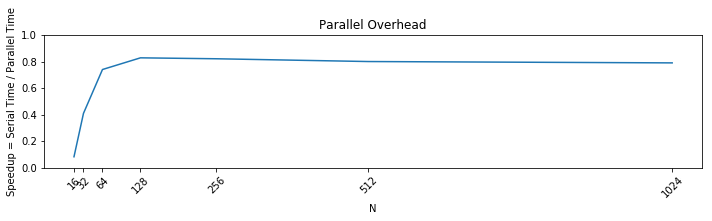

In [10]:
plt.figure(figsize=(10, 3))
plt.plot(Ns, overhead)
plt.xticks(Ns, rotation='45')
plt.xlabel('N')
plt.ylim(0, 1)
plt.ylabel('Speedup = Serial Time / Parallel Time')
plt.title('Parallel Overhead')
plt.tight_layout()

In [11]:
speedups = savg / pavgs[1:]

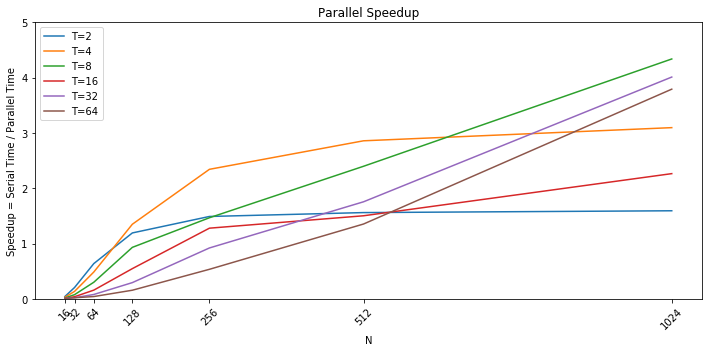

In [12]:
plt.figure(figsize=(10, 5))
for speedup, T in zip(speedups, Ts):
  plt.plot(Ns, speedup, label='T='+str(T))
plt.xticks(Ns, rotation='45')
plt.xlabel('N')
plt.ylim(0, 5)
plt.ylabel('Speedup = Serial Time / Parallel Time')
plt.title('Parallel Speedup')
plt.legend()
plt.tight_layout()

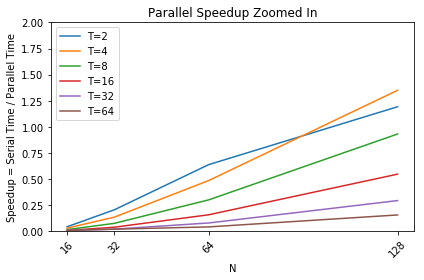

In [13]:
plt.figure()
for speedup, T in zip(speedups[:, :4], Ts):
  plt.plot(Ns[:4], speedup, label='T='+str(T))
plt.xticks(Ns[:4], rotation='45')
plt.xlabel('N')
plt.ylim(0, 2)
plt.ylabel('Speedup = Serial Time / Parallel Time')
plt.title('Parallel Speedup Zoomed In')
plt.legend()
plt.tight_layout()

In [14]:
np.set_printoptions(suppress=True)
raw = re.split(r'\s+', re.sub(r'\[|\]', '', str(savg)))[1:]
print(' & '.join(raw) + ' \\\\', end='\n\n')
for elm in re.split('\n', str(pavgs)):
  raw = re.split(r'\s+', re.sub(r'\[|\]', '', elm))[1:]
  print(' & '.join(raw) + ' \\\\')

0.0103 & 0.077 & 0.5397 & 3.8606 & 27.7838 & 201.0033 & 1538.8375 \\

0.1228 & 0.1871 & 0.7269 & 4.6476 & 33.734 & 250.4153 & 1941.6895 \\
0.2374 & 0.3742 & 0.8454 & 3.2375 & 18.6429 & 128.8042 & 965.7639 \\
0.3393 & 0.5692 & 1.1106 & 2.8603 & 11.8586 & 70.3111 & 496.93 &  \\
0.6409 & 1.0125 & 1.7935 & 4.1444 & 18.9394 & 83.8222 & 354.6732 \\
1.2667 & 1.9749 & 3.4131 & 7.0575 & 21.7313 & 133.7436 & 679.4381 \\
1.2541 & 3.7271 & 6.7731 & 13.1271 & 30.1796 & 114.4917 & 383.592 &  \\
1.2605 & 3.804 & 12.8494 & 24.669 & 51.9702 & 148.4851 & 405.7575 \\


In [15]:
ratios = savg / pavgs
for elm in re.split(']\n', str(ratios)):
  raw = ['%.4f' % float(r) for r in re.split(r'\s+', re.sub(r'\[|\]', '', elm)) 
         if r != '']
  print(' & '.join(raw) + ' \\\\')

0.0839 & 0.4115 & 0.7425 & 0.8307 & 0.8236 & 0.8027 & 0.7925 \\
0.0434 & 0.2058 & 0.6384 & 1.1925 & 1.4903 & 1.5605 & 1.5934 \\
0.0304 & 0.1353 & 0.4860 & 1.3497 & 2.3429 & 2.8588 & 3.0967 \\
0.0161 & 0.0760 & 0.3009 & 0.9315 & 1.4670 & 2.3980 & 4.3387 \\
0.0081 & 0.0390 & 0.1581 & 0.5470 & 1.2785 & 1.5029 & 2.2649 \\
0.0082 & 0.0207 & 0.0797 & 0.2941 & 0.9206 & 1.7556 & 4.0117 \\
0.0082 & 0.0202 & 0.0420 & 0.1565 & 0.5346 & 1.3537 & 3.7925 \\
